- To enhance user analysis, values in '' attributes are normalized to [0,1]



## Get data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pathlib import Path
Path.ls = lambda x: list(x.iterdir())

In [3]:
dpath = Path('/content')

In [28]:
dpath.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/Trend-of-happines-score-factors.png'),
 PosixPath('/content/ladder-score-progression.csv'),
 PosixPath('/content/world-happiness-report-2021.csv'),
 PosixPath('/content/sample_data')]

## Scatter plot
- group by region and scatterplotmaxrix of 3 variables  

In [29]:
static_path = dpath/'world-happiness-report-2021.csv'

In [30]:
static_df = pd.read_csv(static_path); static_df.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [ ]:
splom_df=static_df[['Ladder score', 'Social support', 'Perceptions of corruption', 'Regional indicator']]

Text(0.5, 0.98, 'Scatterplot Matrix for Happiness Score')

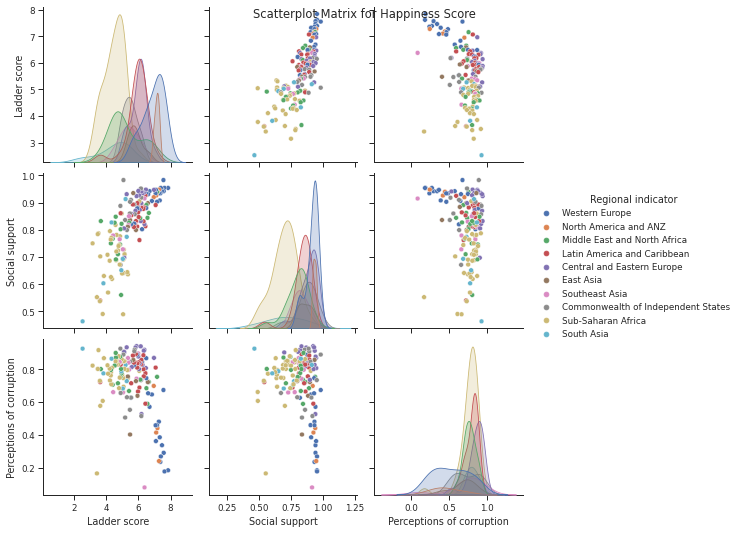

In [ ]:
sns.set_theme(style="ticks")
sns.set_context("paper")
splom = sns.pairplot(splom_df, hue="Regional indicator")
splom.fig.suptitle('Scatterplot Matrix for Happiness Score')

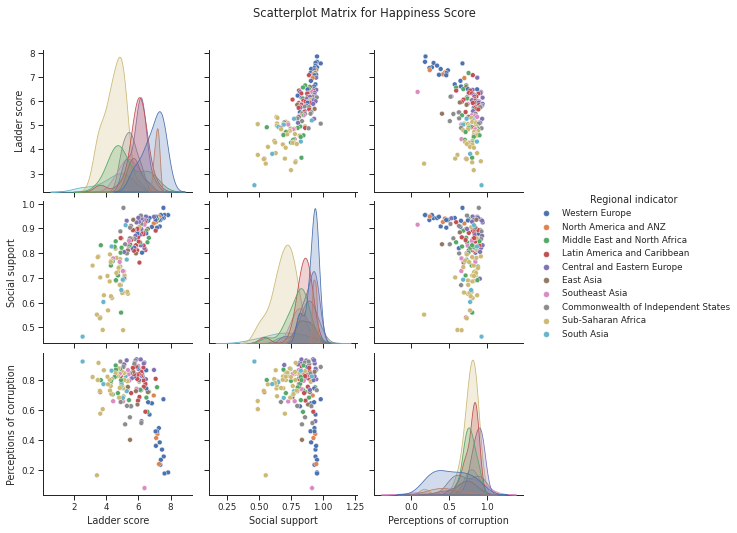

In [ ]:
plt.rcParams["figure.figsize"] = [30, 20]
plt.rcParams["figure.autolayout"] = True
sns.set_theme(style="ticks")
sns.set_context("paper")
splom = sns.pairplot(splom_df, hue="Regional indicator")

plt.subplots_adjust(top=0.9)
splom.fig.suptitle('Scatterplot Matrix for Happiness Score')
plt.savefig('SPLOM')

In [ ]:
# plt.rcParams["figure.figsize"] = [30, 20]
plt.rcParams["figure.autolayout"] = True
sns.set_theme(style="ticks")
sns.set_context("paper")

plt.subplots_adjust(bottom=4)
sns.move_legend("lower center")

splom = sns.pairplot(splom_df, hue="Regional indicator")

plt.subplots_adjust(top=0.9)
splom.fig.suptitle('Scatterplot Matrix for Happiness Score')
plt.show()

ValueError: ignored

<Figure size 2160x1440 with 0 Axes>

In [ ]:
??sns.set

# Parallel coordinate


```
df = pd.read_csv(
    'https://raw.github.com/pandas-dev/'
    'pandas/master/pandas/tests/io/data/csv/iris.csv'
)
pd.plotting.parallel_coordinates(
    df, 'Name', color=('#556270', '#4ECDC4', '#C7F464')
)
```

https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html

In [ ]:
tmp = pd.read_csv(
    'https://raw.github.com/pandas-dev/'
    'pandas/master/pandas/tests/io/data/csv/iris.csv'
)
# pd.plotting.parallel_coordinates(
#     df, 'Name', color=('#556270', '#4ECDC4', '#C7F464')
# )
tmp.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [25]:
prog_path = dpath/'ladder-score-progression.csv'

In [26]:
prog_df = pd.read_csv(prog_path); prog_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
static_df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [31]:
# merge based on country name and remove country name column
result = pd.merge(prog_df, static_df[['Country name', 'Regional indicator']], how="left", on=['Country name'])

In [32]:
result.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


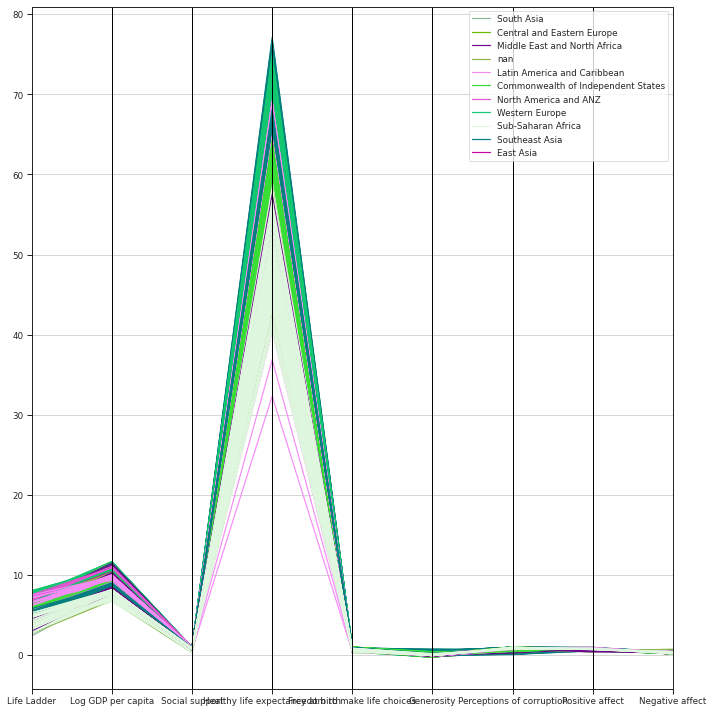

In [ ]:
parallel_coordinates(result.iloc[:, 2:], class_column='Regional indicator')

# Bar chart

In [64]:
prog_path

PosixPath('/content/ladder-score-progression.csv')

In [65]:
prog_df = pd.read_csv(prog_path)

In [66]:
trg_col_ls = ['Life Ladder', 'Perceptions of corruption', 'Social support']
ln_df = prog_df.groupby('year').mean()[trg_col_ls]

In [67]:
ln_df.head(2)

,Life Ladder,Perceptions of corruption,Social support
year,,,
2005,6.446259,0.715880,0.897407
2006,5.196899,0.755747,0.835809


In [ ]:
x = ln_df.index; x

Int64Index([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='year')

In [ ]:
x = ln_df.index
bar_dict = {k: ln_df[k].tolist() for k in trg_col_ls}

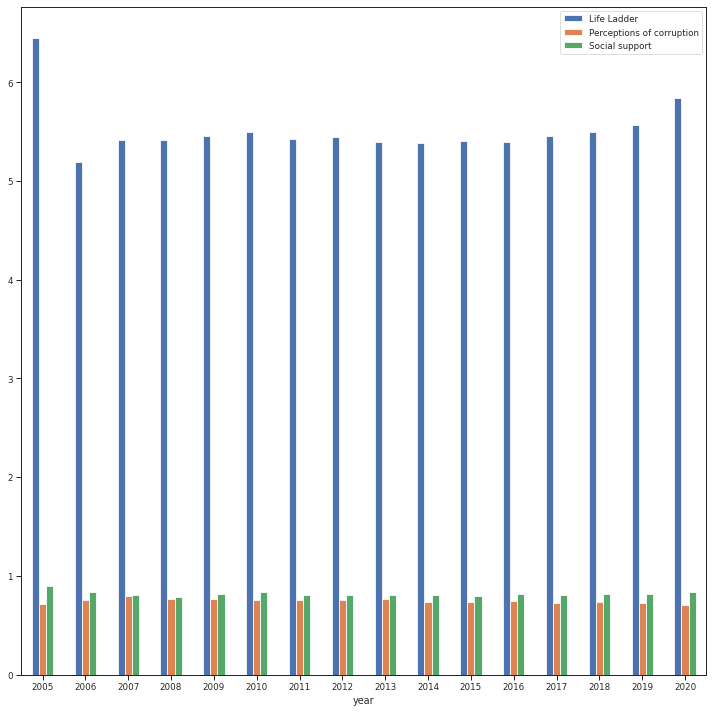

In [ ]:
pd.DataFrame(bar_dict, index=x).plot.bar(rot=0)


# Line chart
- prog_df -  line chart, x axis is year and y axis is average of social support, perception of corruption, ladder score

In [ ]:
prog_df = pd.read_csv(dpath.ls()[1]); prog_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
trg_col_ls = ['Life Ladder', 'Perceptions of corruption', 'Social support']

In [ ]:
year_df = prog_df.groupby('year').mean()[trg_col_ls]; year_df.head()

,Life Ladder,Perceptions of corruption,Social support
year,,,
2005,6.446259,0.715880,0.897407
2006,5.196899,0.755747,0.835809
2007,5.418275,0.792133,0.807770
2008,5.418509,0.764121,0.784391
2009,5.457667,0.763387,0.819071


In [ ]:
mat = np.array(year_df); mat, mat.shape

(array([[6.44625926, 0.71588   , 0.89740741],
        [5.19689888, 0.75574699, 0.83580899],
        [5.41827451, 0.79213265, 0.80777   ],
        [5.41850909, 0.7641215 , 0.78439091],
        [5.45766667, 0.76338739, 0.8190708 ],
        [5.49680645, 0.75723529, 0.83186667],
        [5.42408219, 0.7552029 , 0.8028    ],
        [5.44375352, 0.75795455, 0.80906338],
        [5.39456204, 0.76349231, 0.80655474],
        [5.38902069, 0.73833088, 0.80564085],
        [5.40403497, 0.73652632, 0.79820423],
        [5.39947887, 0.74668702, 0.81189437],
        [5.46040816, 0.72854015, 0.80514384],
        [5.49944366, 0.73367164, 0.81234507],
        [5.57086806, 0.72265441, 0.81679167],
        [5.8406    , 0.70775281, 0.83891579]]), (16, 3))

### Before normalization

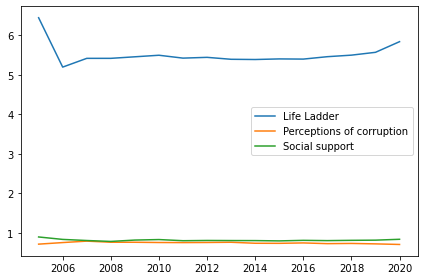

In [ ]:
plt.plot(year_df.index, mat)
plt.legend(['Life Ladder', 'Perceptions of corruption', 'Social support'])
plt.tight_layout()

- I need to normalize - apply standard normal distribution

### After normalization, use mean to get a robust statistics

In [5]:
prog_df = pd.read_csv(dpath.ls()[1]); prog_df.head()
trg_col_ls = ['Life Ladder', 'Perceptions of corruption', 'Social support']
year_df = prog_df.groupby('year').median()[trg_col_ls]; year_df.head()

,Life Ladder,Perceptions of corruption,Social support
year,,,
2005,6.6200,0.745,0.9280
2006,5.0840,0.807,0.8750
2007,5.2215,0.830,0.8320
2008,5.1815,0.817,0.8205
2009,5.3605,0.824,0.8350


In [6]:
ms = year_df.apply(np.mean, axis=0).tolist()
stds = year_df.apply(np.std, axis=0).tolist()
zs = (np.array(year_df)-np.array(ms)) / np.array(stds)

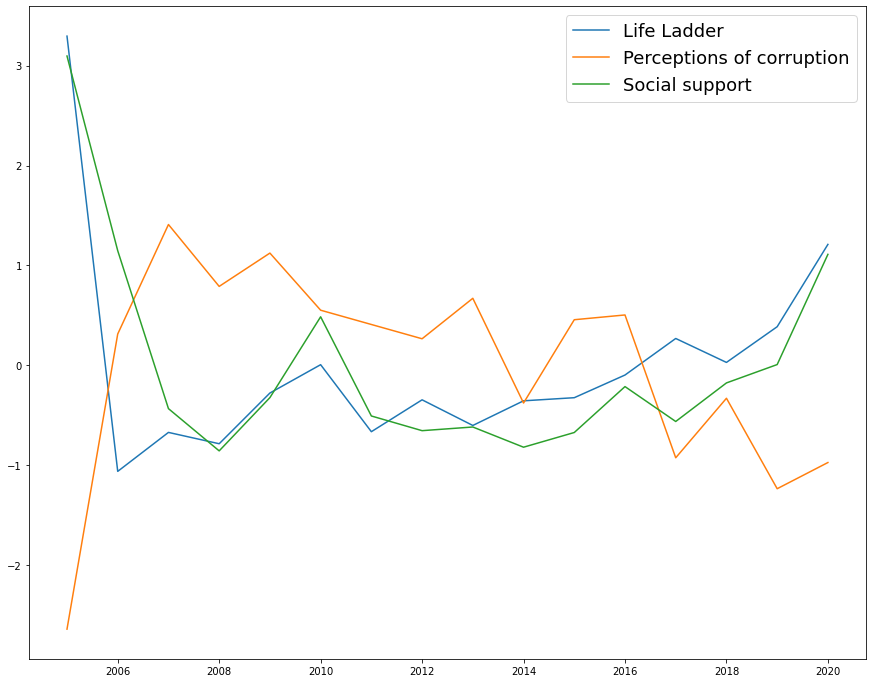

In [20]:
plt.figure(figsize=(15, 12))
plt.plot(year_df.index, zs)
plt.legend(['Life Ladder', 'Perceptions of corruption', 'Social support'],fontsize=18)
plt.savefig('Trend-of-happines-score-factors')
# plt.suptitle("Trend of life ladder, perception of corruption, and social support by year")

### After normalization

In [ ]:
ms = year_df.apply(np.mean, axis=0).tolist()
stds = year_df.apply(np.std, axis=0).tolist()
zs = (np.array(year_df)-np.array(ms)) / np.array(stds)

In [ ]:
zs.mean(axis=0), zs.std(axis=0)

(array([-2.88657986e-15,  2.35922393e-15,  8.15320034e-16]),
 array([1., 1., 1.]))

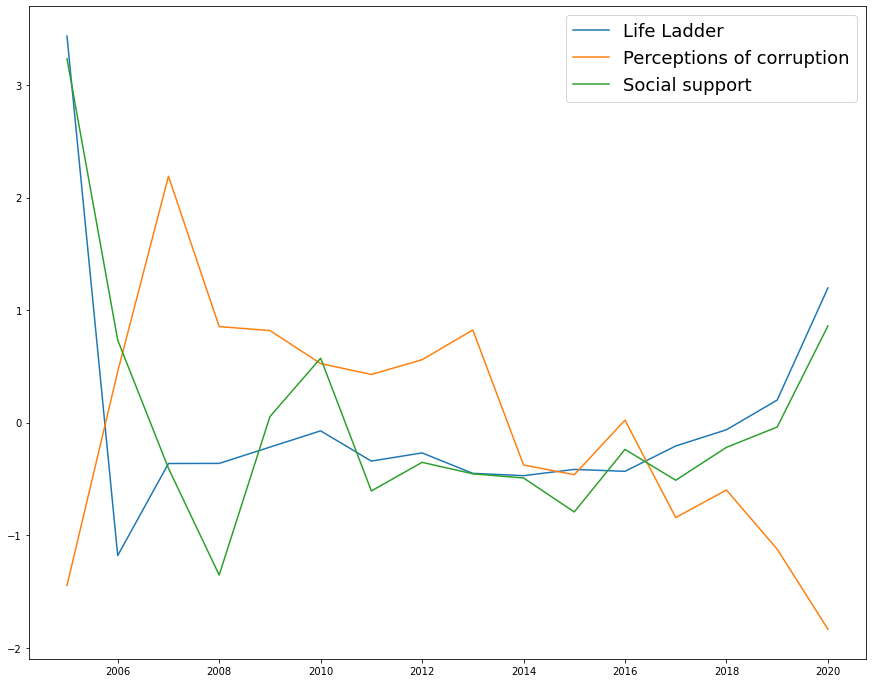

In [ ]:
plt.figure(figsize=(15, 12))
plt.plot(year_df.index, zs)
plt.legend(['Life Ladder', 'Perceptions of corruption', 'Social support'],fontsize=18)
plt.savefig('Trend-of-happines-score-factors')

# Quesitons and investigations

### The number of country that participated in the survey is different from year to year
Not only the sample size affects the consistency of the survey, but also the result can be distorted when we do not see right through the correlations of all attributes.

In [ ]:
gg = prog_df.groupby('year')

In [19]:
gg.count()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,,
2005,27,27,27,27,27,25,1,25,26,26
2006,89,89,88,89,88,86,81,83,89,88
2007,102,102,102,100,101,101,102,98,101,102
2008,110,110,110,110,108,107,109,107,108,110
2009,114,114,113,113,111,112,113,111,113,113
2010,124,124,123,120,121,122,123,119,120,120
2011,146,146,145,145,141,145,144,138,145,146
2012,142,142,140,142,136,141,133,132,142,142
2013,137,137,136,137,133,136,133,130,135,137


### Then which country/continents are predominent each year?

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby-with-multiindex

In [ ]:
# pd.options.display.max_colwidth = 180
pd.options.display.max_rows = 20000
from IPython.display import display,HTML

In [34]:
result.head(3)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.8,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.2,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.6,0.600,0.121,0.707,0.618,0.275,South Asia


- multi index, year and region

In [43]:
array = [result['year'].tolist(), result['Regional indicator'].tolist()]

In [46]:
df_sub = result[['Life Ladder', 'Social support', 'Perceptions of corruption']]

In [47]:
df_idx = pd.MultiIndex.from_arrays(array, names=['year', 'region'])

- fill 1 in new column and sum to count the number of region each year

In [93]:
gg = pd.Series([1]*1949, index=df_idx); gg.head(2)

year  region    
2008  South Asia    1
2009  South Asia    1
dtype: int64

In [94]:
gg2 = gg.groupby(level=['year', 'region']).sum(); gg2.head(2)

year  region                    
2005  Central and Eastern Europe    4
      East Asia                     1
dtype: int64

In [63]:
display(gg2)

year  region                            
2005  Central and Eastern Europe             4
      East Asia                              1
      Latin America and Caribbean            3
      Middle East and North Africa           6
      North America and ANZ                  2
      South Asia                             1
      Western Europe                        10
2006  Central and Eastern Europe             5
      Commonwealth of Independent States    11
      East Asia                              4
      Latin America and Caribbean           18
      Middle East and North Africa           5
      North America and ANZ                  2
      South Asia                             4
      Southeast Asia                         8
      Sub-Saharan Africa                    22
      Western Europe                         8
2007  Central and Eastern Europe            15
      Commonwealth of Independent States    10
      East Asia                              4
      Latin America

In [105]:
gg3 = gg2.unstack()

In [108]:
??pd.DataFrame(gg3, index=gg3.index).plot.bar

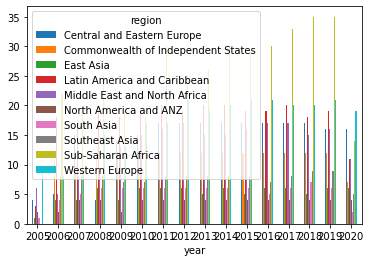

In [107]:
pd.DataFrame(gg3, index=gg3.index).plot.bar(rot=0)

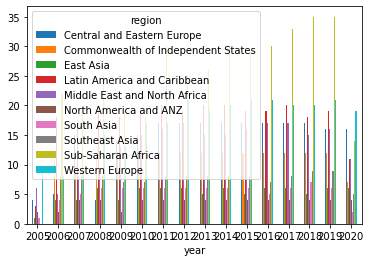

In [111]:
gg3.plot.bar(rot=0)

---

In [130]:
from inspect import *

In [116]:
inspect.getmembers(inspect)

[('ArgInfo', inspect.ArgInfo),
 ('ArgSpec', inspect.ArgSpec),
 ('Arguments', inspect.Arguments),
 ('Attribute', inspect.Attribute),
 ('BlockFinder', inspect.BlockFinder),
 ('BoundArguments', inspect.BoundArguments),
 ('CORO_CLOSED', 'CORO_CLOSED'),
 ('CORO_CREATED', 'CORO_CREATED'),
 ('CORO_RUNNING', 'CORO_RUNNING'),
 ('CORO_SUSPENDED', 'CORO_SUSPENDED'),
 ('CO_ASYNC_GENERATOR', 512),
 ('CO_COROUTINE', 128),
 ('CO_GENERATOR', 32),
 ('CO_ITERABLE_COROUTINE', 256),
 ('CO_NESTED', 16),
 ('CO_NEWLOCALS', 2),
 ('CO_NOFREE', 64),
 ('CO_OPTIMIZED', 1),
 ('CO_VARARGS', 4),
 ('CO_VARKEYWORDS', 8),
 ('ClosureVars', inspect.ClosureVars),
 ('EndOfBlock', inspect.EndOfBlock),
 ('FrameInfo', inspect.FrameInfo),
 ('FullArgSpec', inspect.FullArgSpec),
 ('GEN_CLOSED', 'GEN_CLOSED'),
 ('GEN_CREATED', 'GEN_CREATED'),
 ('GEN_RUNNING', 'GEN_RUNNING'),
 ('GEN_SUSPENDED', 'GEN_SUSPENDED'),
 ('OrderedDict', collections.OrderedDict),
 ('Parameter', inspect.Parameter),
 ('Signature', inspect.Signature),
 ('TPFL

In [133]:
getfullargspec(gg3.plot)

FullArgSpec(args=['self'], varargs='args', varkw='kwargs', defaults=None, kwonlyargs=[], kwonlydefaults=None, annotations={})

In [ ]:
pd.DataFrame(gg3, index=gg3.index).plot()

## references

- [pandas groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby-with-multiindex)